In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import get_default_single_pipeline_model

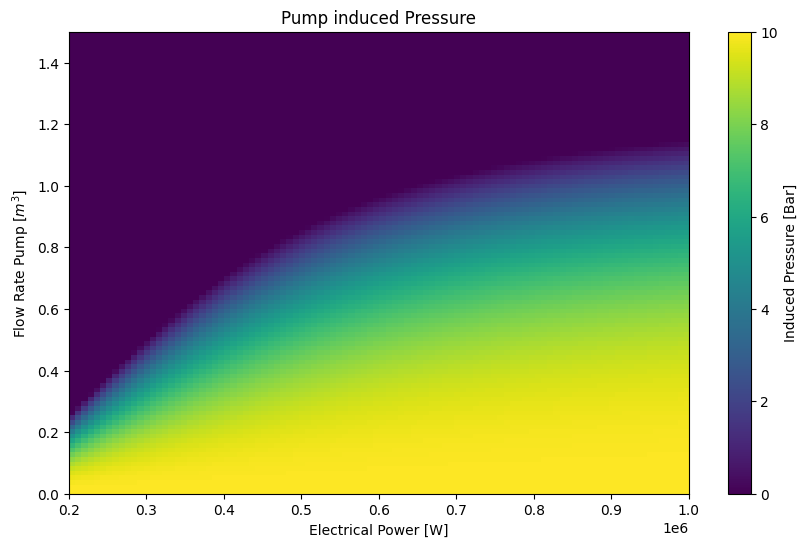

In [2]:
def plot_pump_characteristics():
    model = get_default_single_pipeline_model()
    
    powers = np.linspace(model.min_power, model.max_power, 100)
    flow_rates = np.linspace(0, 1.5, 100)
    pressures = np.zeros((len(flow_rates), len(powers)))
    
    # calculate pressure for different flow rate and power combinations
    for i, flow_rate in enumerate(flow_rates):
        for j, power in enumerate(powers):
            model.power = power
            model.pipelines[0].flow_rate = flow_rate
            pressures[i, j] = model.p_pump()
    
    # clip values to zero
    pressures = np.clip(pressures, 0, None)
    
    # plot heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(pressures/100000, extent=(min(powers), max(powers), min(flow_rates), max(flow_rates)),
               aspect='auto', vmin=0, origin='lower')
    plt.colorbar(label='Induced Pressure [Bar]')
    plt.title("Pump induced Pressure")
    plt.xlabel("Electrical Power [W]")
    plt.ylabel("Flow Rate Pump [$m^3$]")
    plt.show()
    
plot_pump_characteristics()